In [2]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')

In [4]:
transaction_features = transactions_df.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    transaction_count=('TransactionID', 'count'),
    avg_transaction_value=('TotalValue', 'mean')
).reset_index()

In [5]:
final_features = pd.merge(customers_df, transaction_features, on='CustomerID')

In [6]:
kmeans = KMeans(n_clusters=5, random_state=42)
final_features['Cluster'] = kmeans.fit_predict(final_features[['total_spent', 'transaction_count', 'avg_transaction_value']])


In [7]:
db_index = davies_bouldin_score(final_features[['total_spent', 'transaction_count', 'avg_transaction_value']], final_features['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')


Davies-Bouldin Index: 0.6375161720046073


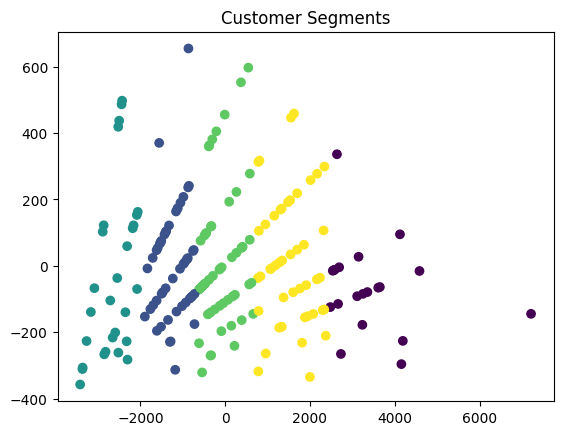

In [8]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(final_features[['total_spent', 'transaction_count', 'avg_transaction_value']])
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=final_features['Cluster'])
plt.title("Customer Segments")
plt.show()